<a href="https://colab.research.google.com/github/NastiiaKoval/Machine-Learning/blob/main/%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D1%8C_%D0%BF%D1%80_8.ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ЛАБОРАТОРНА РОБОТА 8

Завдання
1. Провести повний аналіз даних.
Датасет знаходиться за посиланням https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets %2Fprishasawhney%2Fmushroom-dataset

Датасет містить інформацію про гриби.

- Завантажити датасет.
- Вивести перші 5 рядків.
- Вивести розмір датасету, наявність пропущених даних, типи даних. Вивести матрицю кореляції.
- Вивевести кореляцію із цільовою функцією.

2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), підібрати параметри.
Оцінити моделі.
Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.
3. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
4. Зробити візуалізацію кількості кластерів двома методами на вибір, наприклад (K-means, DBSCAN).
ЗРОБИТИ ВИСНОВКИ

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/mushroom_cleaned_new.csv')
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
data.shape

(54035, 9)

In [ ]:
data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
data.dtypes

,0
cap-diameter,int64
cap-shape,int64
gill-attachment,int64
gill-color,int64
stem-height,float64
stem-width,int64
stem-color,int64
season,float64
class,int64


In [ ]:
correlation_matrix = data.corr()

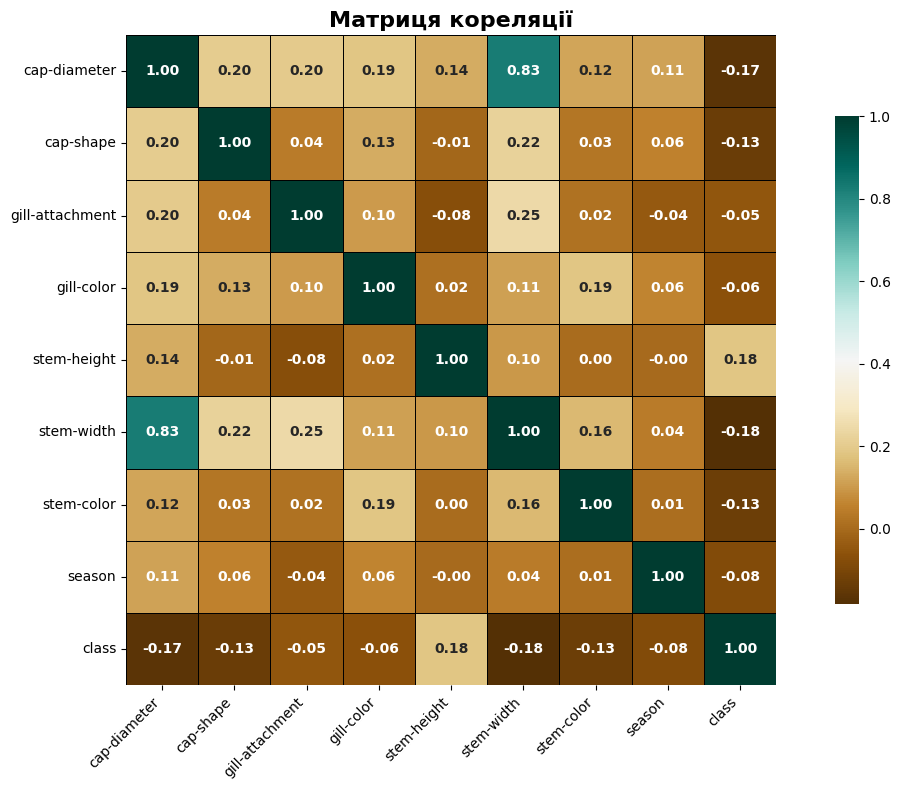

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BrBG', linewidths=0.5, linecolor='black', square=True, cbar_kws={'shrink': 0.75}, annot_kws={"size": 10, "weight": "bold"})
plt.title('Матриця кореляції', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Побудова моделей

In [ ]:
X = data.drop(columns='class')
y = data['class']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Логістична регресія
logistic_model = LogisticRegression(max_iter=1000)
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
# Випадковий ліс
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

3. Оцінити моделі. Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.

In [ ]:
# Оцінка моделі логістичної регресії
logistic_best_model = logistic_grid.best_estimator_
y_pred_logistic = logistic_best_model.predict(X_test)

print("Логістична регресія:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Логістична регресія:
[[2630 2279]
 [1648 4250]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



In [ ]:
# Оцінка моделі випадковий ліс
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

print("Випадковий ліс:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Випадковий ліс:
[[4857   52]
 [  47 5851]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [ ]:
inertia = []
silhouette_scores = []

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

In [ ]:
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]

inertia_diff = [inertia[i] - inertia[i + 1] for i in range(len(inertia) - 1)]
optimal_k_elbow = inertia_diff.index(max(inertia_diff)) + 2


print(f'Оптимальна кількість кластерів (метод силуетів): {optimal_k_silhouette}')
print(f'Оптимальна кількість кластерів (метод ліктя): {optimal_k_elbow}')

Оптимальна кількість кластерів (метод силуетів): 2
Оптимальна кількість кластерів (метод ліктя): 2


# візуалізація

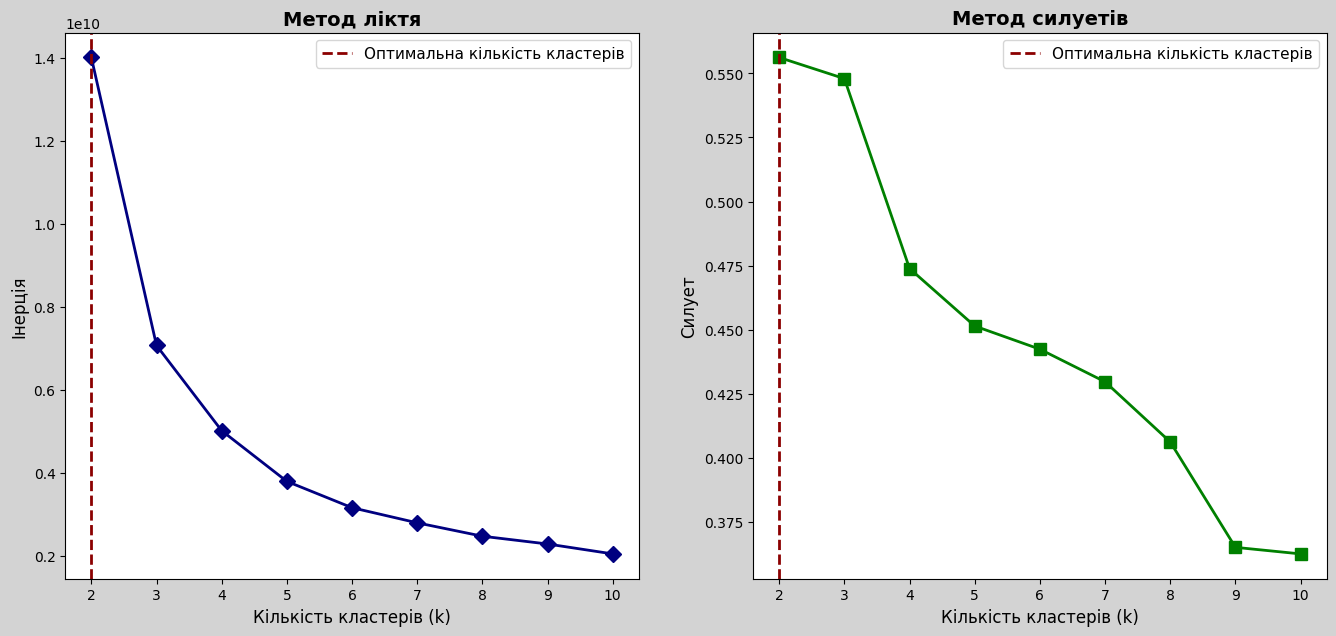

In [ ]:
plt.figure(figsize=(14, 7), facecolor='lightgrey')

# Графік методу ліктя
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='D', color='navy', markersize=8, linestyle='-', linewidth=2)
plt.axvline(optimal_k_elbow, color='darkred', linestyle='--', linewidth=2, label='Оптимальна кількість кластерів')
plt.title('Метод ліктя', fontsize=14, fontweight='bold')
plt.xlabel('Кількість кластерів (k)', fontsize=12)
plt.ylabel('Інерція', fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=11)

# Графік методу силуетів
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', color='green', markersize=8, linestyle='-', linewidth=2)
plt.axvline(optimal_k_silhouette, color='darkred', linestyle='--', linewidth=2, label='Оптимальна кількість кластерів')
plt.title('Метод силуетів', fontsize=14, fontweight='bold')
plt.xlabel('Кількість кластерів (k)', fontsize=12)
plt.ylabel('Силует', fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=11)

plt.tight_layout(pad=3, h_pad=2)
plt.show()

ВИСНОВКИ

Логістична регресія з регуляризацією показала точність 64%, з кращими результатами для класу 1, що вказує на дещо кращу здатність моделі передбачати позитивні результати.

Модель випадкового лісу досягла майже ідеальної точності 99%, однак це свідчить про перенавчання.

У кластеризації KMeans оптимальна кількість кластерів — 2, із метрикою силуету 0.556, що свідчить про прийнятний розподіл.